# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Import data

In [2]:
data=pd.read_csv(r"C:\Users\vidya\Downloads\Fish.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
data["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [7]:
d1=pd.DataFrame(data["Species"].value_counts())
d1.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


<function matplotlib.pyplot.show(close=None, block=None)>

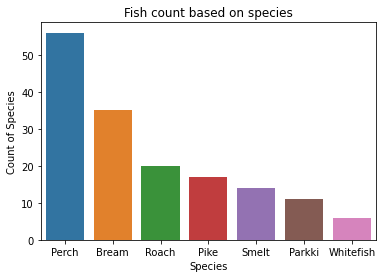

In [8]:
sns.barplot(x=d1.index,y=d1.Species)
plt.xlabel("Species")
plt.ylabel("Count of Species")
plt.title("Fish count based on species")
plt.show

# Label Encoding

In [9]:
l=LabelEncoder()
data["Species"]=l.fit_transform(data["Species"])

In [10]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [11]:
x=data.iloc[:,[0,2,3,4,5,6]].values
y=data.iloc[:,1].values

In [12]:
print(x)

[[ 0.     23.2    25.4    30.     11.52    4.02  ]
 [ 0.     24.     26.3    31.2    12.48    4.3056]
 [ 0.     23.9    26.5    31.1    12.3778  4.6961]
 [ 0.     26.3    29.     33.5    12.73    4.4555]
 [ 0.     26.5    29.     34.     12.444   5.134 ]
 [ 0.     26.8    29.7    34.7    13.6024  4.9274]
 [ 0.     26.8    29.7    34.5    14.1795  5.2785]
 [ 0.     27.6    30.     35.     12.67    4.69  ]
 [ 0.     27.6    30.     35.1    14.0049  4.8438]
 [ 0.     28.5    30.7    36.2    14.2266  4.9594]
 [ 0.     28.4    31.     36.2    14.2628  5.1042]
 [ 0.     28.7    31.     36.2    14.3714  4.8146]
 [ 0.     29.1    31.5    36.4    13.7592  4.368 ]
 [ 0.     29.5    32.     37.3    13.9129  5.0728]
 [ 0.     29.4    32.     37.2    14.9544  5.1708]
 [ 0.     29.4    32.     37.2    15.438   5.58  ]
 [ 0.     30.4    33.     38.3    14.8604  5.2854]
 [ 0.     30.4    33.     38.5    14.938   5.1975]
 [ 0.     30.9    33.5    38.6    15.633   5.1338]
 [ 0.     31.     33.5    38.7 

In [13]:
print(y)

[ 242.   290.   340.   363.   430.   450.   500.   390.   450.   500.
  475.   500.   500.   340.   600.   600.   700.   700.   610.   650.
  575.   685.   620.   680.   700.   725.   720.   714.   850.  1000.
  920.   955.   925.   975.   950.    40.    69.    78.    87.   120.
    0.   110.   120.   150.   145.   160.   140.   160.   169.   161.
  200.   180.   290.   272.   390.   270.   270.   306.   540.   800.
 1000.    55.    60.    90.   120.   150.   140.   170.   145.   200.
  273.   300.     5.9   32.    40.    51.5   70.   100.    78.    80.
   85.    85.   110.   115.   125.   130.   120.   120.   130.   135.
  110.   130.   150.   145.   150.   170.   225.   145.   188.   180.
  197.   218.   300.   260.   265.   250.   250.   300.   320.   514.
  556.   840.   685.   700.   700.   690.   900.   650.   820.   850.
  900.  1015.   820.  1100.  1000.  1100.  1000.  1000.   200.   300.
  300.   300.   430.   345.   456.   510.   540.   500.   567.   770.
  950.  1250.  1600.

<function matplotlib.pyplot.show(close=None, block=None)>

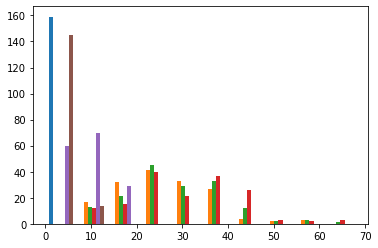

In [14]:
plt.hist(x)
plt.show

In [15]:
s=StandardScaler()
s1=s.fit_transform(x)
s1

array([[-1.33273018e+00, -3.05788578e-01, -2.82303007e-01,
        -1.06020232e-01,  5.96578670e-01, -2.36528948e-01],
       [-1.33273018e+00, -2.25507242e-01, -1.98053663e-01,
        -2.33668373e-03,  8.21260549e-01, -6.65789457e-02],
       [-1.33273018e+00, -2.35542409e-01, -1.79331587e-01,
        -1.09769794e-02,  7.97341291e-01,  1.65793169e-01],
       [-1.33273018e+00,  5.30159764e-03,  5.46943678e-02,
         1.96390116e-01,  8.79771455e-01,  2.26210031e-02],
       [-1.33273018e+00,  2.53719316e-02,  5.46943678e-02,
         2.39591594e-01,  8.12834979e-01,  4.26371272e-01],
       [-1.33273018e+00,  5.54774324e-02,  1.20221635e-01,
         3.00073664e-01,  1.08395111e+00,  3.03431249e-01],
       [-1.33273018e+00,  5.54774324e-02,  1.20221635e-01,
         2.82793073e-01,  1.21901769e+00,  5.12357880e-01],
       [-1.33273018e+00,  1.35758768e-01,  1.48304750e-01,
         3.25994551e-01,  8.65728838e-01,  1.62163285e-01],
       [-1.33273018e+00,  1.35758768e-01,  1.483

<function matplotlib.pyplot.show(close=None, block=None)>

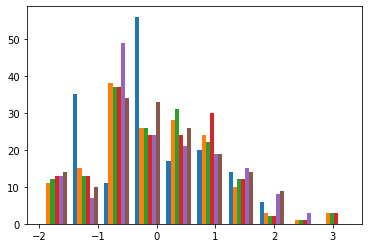

In [16]:
plt.hist(s1)
plt.show

# Whisker box plot

C:\Users\vidya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outlier of Weight')

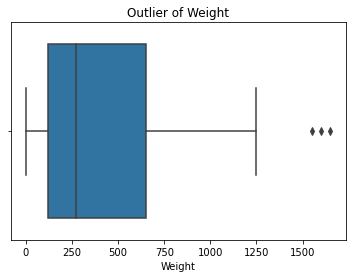

In [17]:
sns.boxplot(data["Weight"])
plt.title("Outlier of Weight")

# Removing Outlier

In [18]:
Q1=data["Weight"].quantile(0.25)
Q3=data["Weight"].quantile(0.75)
IQR=Q3-Q1
upper_end=Q3+1.5*IQR
lower_end=Q1-1.5*IQR
upper=np.where(data["Weight"]>=upper_end)
lower=np.where(data["Weight"]<=lower_end)
data.drop(upper[0],inplace=True)
data.drop(lower[0],inplace=True)

Text(0.5, 1.0, 'Outlier Detection of weight')

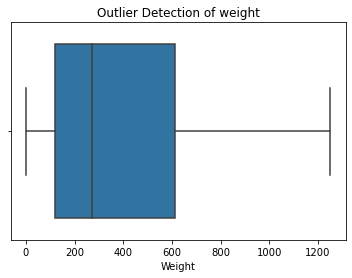

In [19]:
sns.boxplot(x=data["Weight"])
plt.title("Outlier Detection of weight")

<AxesSubplot:>

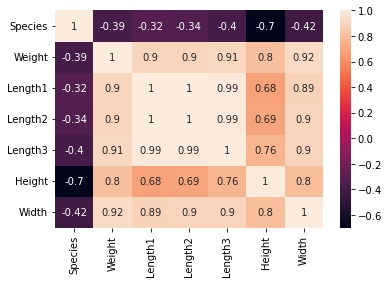

In [20]:
a=sns.heatmap(data.corr(),annot=True)
a

In [21]:
del data["Length1"]

In [22]:
data

,Species,Weight,Length2,Length3,Height,Width
0,0,242.0,25.4,30.0,11.5200,4.0200
1,0,290.0,26.3,31.2,12.4800,4.3056
2,0,340.0,26.5,31.1,12.3778,4.6961
3,0,363.0,29.0,33.5,12.7300,4.4555
4,0,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,5,12.2,12.2,13.4,2.0904,1.3936
155,5,13.4,12.4,13.5,2.4300,1.2690
156,5,12.2,13.0,13.8,2.2770,1.2558
157,5,19.7,14.3,15.2,2.8728,2.0672


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

In [24]:
print((x_train).shape)
print((x_test).shape)
print((y_train).shape)
print((y_test).shape)

(127, 6)
(32, 6)
(127,)
(32,)


# Analysis by using Multiple linear regression

In [25]:
l1=LinearRegression()
l1.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred=l1.predict(x_test)
y_pred

array([ 849.43105572,  541.83157938,  524.51402475, -140.17098724,
        167.06871384,  351.78686985,  943.73900262,  230.38021606,
        401.36740647,  975.77025711, 1143.54372722,   47.98044385,
        302.92954786,  282.72811737,  897.29570635,  178.94802785,
       -194.61125743,  664.2968628 ,  141.12705122,  712.77521878,
        454.56332644,  837.88267464,   90.56015679,  477.5131189 ,
        459.63842507,  589.58554181,  572.6777243 , -131.35793409,
        -23.74800844,  239.43426789,  125.85829098,  223.59409982])

In [27]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


99.36075513546191
18470.542922921093
135.90637557863536


In [28]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)*100
r2

87.03758214550389